# Problem 1

One of the most famous sets of differential equations in physics are the Lorenz equations
\begin{align}
    \dot{x} &= \sigma (y-x) & \dot{y} &= rx - y - xz & \dot{z} &= xy - bz
\end{align}
where $\sigma$, r, and b are constants. (The names $\sigma$, r, and b are strange but traditional - they are always used in these equations for historical reasons.) 

These equations were first studied by Edward Lorenz in 1963, who derived them from a simplified model of weather patterns. The reason for their fame is that they were one of the first incontrovertible examples of deterministic chaos, the occurrence of seemingly random motion, although there is nothing random in the equations.

**a)** Write a program to solve the Lorenz equations for for the case in which $\sigma = 10$, $r = 28$, $b = 8/3$ in the range from $t = 0$ to $t = 50$ with initial conditions $(x,y,z) = (0,1,0)$. Make your program produce a graph of time. note how unpredictable the movement is. 
***

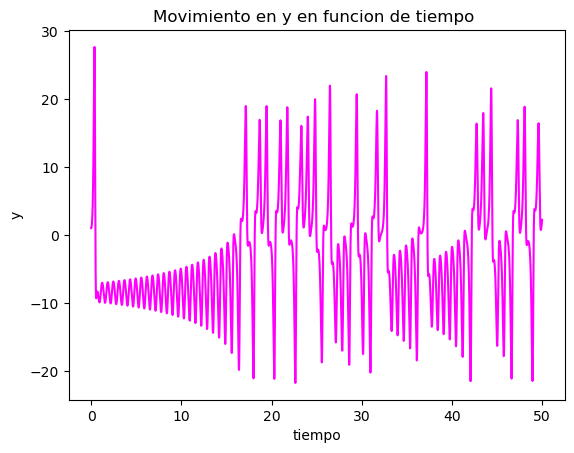

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.close("all")
o=10
R=28
b=8/3

def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = o*(y-x)
    fy = R*x - y - x*z
    fz = x*y - b*z
    return np.array([fx,fy,fz],float)

t1=0
t2=50
N=10000
h = (t2-t1)/N
tp = np.arange(t1,t2,h)
xp=[]
yp=[]
zp=[]
r = np.array([0,1,0],float) 

for t in tp:
    xp.append(r[0])
    yp.append(r[1])
    zp.append(r[2])
    k1 = h*f(r,t)
    k2 = h*f(r+ 0.5*k1 ,t+ 0.5*h)
    k3 = h*f(r+ 0.5*k2, t+ 0.5*h)
    k4 = h*f(r+ k3, t+ h)
    r += (k1+ 2*k2 + 2*k3 + k4)/6
    
plt.plot(tp,yp,"magenta")
plt.title("Movement in y as a function of time")
plt.xlabel("time");plt.ylabel("y")
plt.show()

**b)** Modify your program to produce a plot of z against x. You should see a plot of the famous 'strange attractor' of the Lorenz equations, a butterfly-shaped graph that never repeats.
***

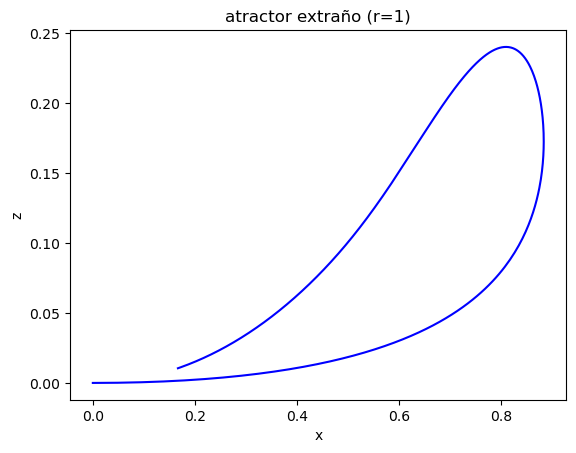

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.close("all")
o=10
R=1
b=8/3

def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = o*(y-x)
    fy = R*x - y - x*z
    fz = x*y - b*z
    return np.array([fx,fy,fz],float)

t1=0
t2=50
N=10000
h = (t2-t1)/N
tp = np.arange(t1,t2,h)
xp=[]
yp=[]
zp=[]
r = np.array([0,1,0],float) 

for t in tp:
    xp.append(r[0])
    yp.append(r[1])
    zp.append(r[2])
    k1 = h*f(r,t)
    k2 = h*f(r+ 0.5*k1 ,t+ 0.5*h)
    k3 = h*f(r+ 0.5*k2, t+ 0.5*h)
    k4 = h*f(r+ k3, t+ h)
    r += (k1+ 2*k2 + 2*k3 + k4)/6
    

plt.plot(xp,zp,"blue")
plt.title("Strange atractor (r=1)")
plt.xlabel("x");plt.ylabel("z")
plt.show()

**c)** Show the graphs, for part **a)** and **b)** for $r=1$.
***

# Problem 2

A classic example of a diffusion problem with a time-dependent condition is the diffusion of heat into the Earth's crust, where the surface temperature varies with the seasons of the year. Suppose the average daily temperature at a particular point on the surface varies as:
\begin{gather}
    T_0(t) = A + B\sin{\frac{2\pi t}{\tau}}
\end{gather}
where $\tau = 356$ days, $A = 100$ °C, and $B = 120$ °C. At a depth of 20 m below the surface, the annual variation in temperature disappears, and it is a good approximation to consider a constant temperature of 110°C (which is higher than the average surface temperature of 100°C - temperatures increase with depth due to heating from the Earth's core). The thermal diffusivity of the Earth's crust varies slightly from place to place, but for our purposes, we will consider it constant with a value of $D = 0.1$ m$^2$/day.

**a)** Write a program or modify one from Chapter 9 of the book to calculate the temperature distribution as a function of depth up to 20 m and time up to 10 years. Begin with the temperature equal to 100 °C, except at the surface and at the deepest point.
***

**b)** Run your program for the first 9 simulated years to reach equilibrium. Then, for the tenth year (and final year of the simulation), plot in a single graph the temperature distribution every 3 months to illustrate how the temperature changes as a function of depth and time.
***

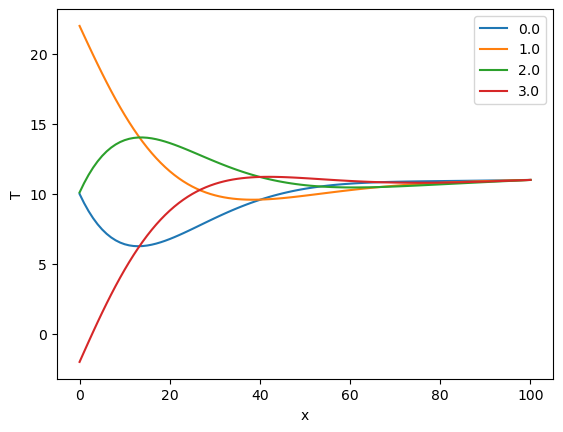

In [4]:
import pylab as plt
import numpy as np

A = 10
B = 12
tau = 365
D = 0.1

def T0(t):
	return A + B*np.sin(2*np.pi*t/tau)

L = 20 
D = 0.1 
N = 100    
a = L/N 
h = 0.01   

T = np.zeros(N+1,float)
T[1:N]=10

def iterate(T,t_min,t_max):
	t = t_min
	c = h*D/a**2
	while t<t_max:
		T[0] = T0(t)
		T[N] = 11
		T[1:N] = T[1:N] + c*(T[2:N+1]+T[0:N-1]-2*T[1:N])
		t += h
	return T

T9 = iterate(T,0,365*9)
T9_i = T9
t_min = 365*9

for t_max in [365*9 + i*(365//4) for i in range(4)]:
	T9_i = iterate(T9_i,t_min,t_max)
	plt.plot(T9_i,label=t_max%365/(365//4))
	t_min = t_max

plt.legend()
plt.xlabel("x")
plt.ylabel("T")
plt.show()

**c)** Interpret the result from part **b)**
***

Note two important things. First, regardless of the time of year, all temperature graphs converge. This supports the fact that as you go deeper into the Earth, temperature does not depend on where the Earth is located. Second, the graph shows a certain symmetry between certain times of the year. This should not be surprising given that the Earth's orbit is approximately circular with a constant axis rotation.